In [1]:
import numpy as np
import panda as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrices import accuracy_score


ModuleNotFoundError: No module named 'request'

In [1]:
import tensorflow
import numpy as np
import keras
import cv2,os


In [3]:
data_path=r'C:\Users\KIIT\Desktop\Arthritis\base data\training'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'grade B mild': 0, 'grade d severe': 1}
['grade B mild', 'grade d severe']
[0, 1]


In [5]:
img_size= 136
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [7]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

from keras.utils import to_categorical
new_label= to_categorical(label)

In [9]:
new_label.shape

(20, 2)

In [11]:
data.shape

(20, 136, 136, 1)

In [13]:
data.shape[1:]

(136, 136, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\KIIT\Desktop\tfproject\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Input(shape=data.shape[1:]))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# The third convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
# Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# Dense layer of 64 neurons

model.add(Dense(2, activation='softmax'))
# The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 134, 134, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 134, 134, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 67, 67, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 65, 65, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,023,650 (3.90 MB)

 Trainable params: 1,023,650 (3.90 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

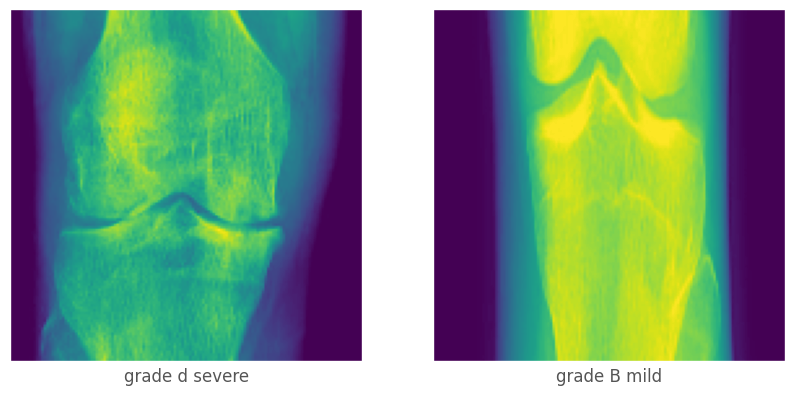

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(len(x_test)):
    plt.subplot(1, len(x_test), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [105]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.7065
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.5000 - loss: 0.6817 - val_accuracy: 0.5000 - val_loss: 0.7145
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7143 - loss: 0.6442 - val_accuracy: 0.5000 - val_loss: 0.8179
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.5000 - loss: 0.7013 - val_accuracy: 0.5000 - val_loss: 0.7522
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6429 - loss: 0.6316 - val_accuracy: 0.5000 - val_loss: 0.7756
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.6429 - loss: 0.6602 - val_accuracy: 0.5000 - val_loss: 0.8564
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 0.5714 - loss: 0.6072 - val_accuracy: 0.2500 - val_loss: 0.8227
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.7143 - loss: 0.5870 - val_accuracy: 0.2500 - val_

In [109]:
model.save('model.keras')

In [111]:
from matplotlib import pyplot as plt

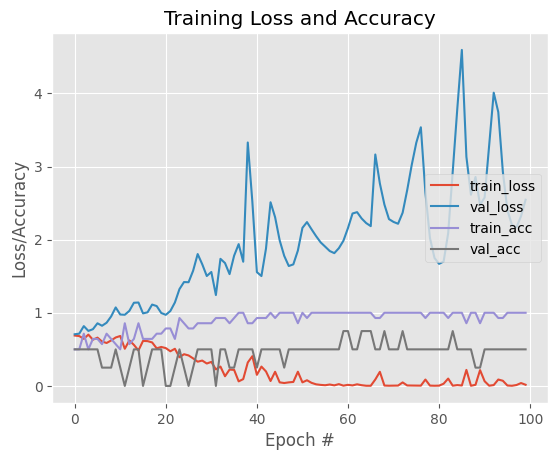

In [113]:
N = 100 #number of epochs

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")


In [115]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 5.841235179104842e-06 %
test accuracy: 1.0 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
A.I predicts: grade B mild
Correct prediction for label 0 is grade B mild


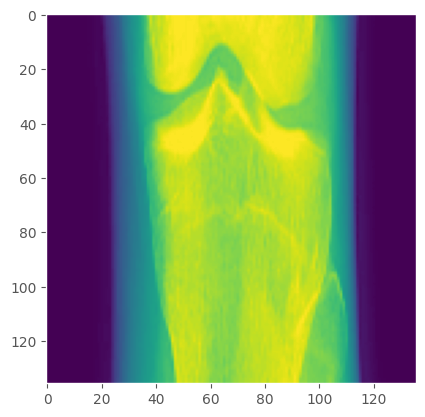

In [141]:
X = 1

img_size = 136

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],136,136,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()